In [2]:
# чтобы изменения в других файлах автоматически подгружались в импорты
%load_ext IPython.extensions.autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('../..')
from model import FinData
from model import train_valid_split
from model import CatboostFinModel

c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime as dt

In [4]:
data = FinData("../../datasets/T_yandex_10min.csv")

data.restrict_time_down(months=6)

data.insert_shifts_norms()
data.insert_rolling_means()
data.insert_exp_rolling_means()
data.insert_stochastic_oscillator()
data.insert_high_low_diff()
data.insert_bollinger()


In [5]:
args = {"iterations" : 10000, 
        "depth" : 5, 
        "learning_rate" : 0.01, # тут слегка неадекватные параметры, которые можно менять 
        "use_best_model" : True, 
        "reg_lambda" : 0.1, # L1
        "loss_function" : 'CrossEntropy', 
        "eval_metric" : 'Accuracy', 
        "cat_features" : data.cat_features, 
        "random_state" : 42,
        "early_stopping_rounds" : 2500}


model = CatboostFinModel(args)
model.cat = data.cat_features
model.numeric = data.numeric_features

X, y = data.df[model.cat + model.numeric], data.df['direction_binary']

samples_list = [5, 10, 15]
answers = []
for i in samples_list:
        answers.append(model.cross_validation(X, y, n_samples=i))

for i, n in enumerate(samples_list):
        print(f"N_samples: {n} - avg accuracy {answers[i]}")

0:	learn: 0.6051937	test: 0.5589789	best: 0.5589789 (0)	total: 196ms	remaining: 32m 39s
1000:	learn: 0.8551937	test: 0.5629401	best: 0.5827465 (211)	total: 5.69s	remaining: 51.2s
2000:	learn: 0.9555458	test: 0.5550176	best: 0.5827465 (211)	total: 10.8s	remaining: 43s
Stopped by overfitting detector  (2500 iterations wait)

bestTest = 0.5827464789
bestIteration = 211

Shrink model to first 212 iterations.
0:	learn: 0.5875880	test: 0.5787852	best: 0.5787852 (0)	total: 11.4ms	remaining: 1m 54s
1000:	learn: 0.7585827	test: 0.5748239	best: 0.5915493 (284)	total: 5.8s	remaining: 52.2s
2000:	learn: 0.8653169	test: 0.5695423	best: 0.5915493 (284)	total: 11.4s	remaining: 45.5s
Stopped by overfitting detector  (2500 iterations wait)

bestTest = 0.5915492958
bestIteration = 284

Shrink model to first 285 iterations.
0:	learn: 0.5837735	test: 0.6034331	best: 0.6034331 (0)	total: 9.69ms	remaining: 1m 36s
1000:	learn: 0.7177230	test: 0.5897887	best: 0.6043134 (95)	total: 7.22s	remaining: 1m 4s
2000:

In [7]:
data.insert_random_prediction()

model = CatboostFinModel(args)
model.cat = data.cat_features
model.numeric = data.numeric_features

X, y = data.df[model.cat + model.numeric], data.df['direction_binary']

samples_list = [5, 10, 15]
answers = []
for i in samples_list:
        answers.append(model.cross_validation(X, y, n_samples=i))

for i, n in enumerate(samples_list):
        print(f"N_samples: {n} - avg accuracy {answers[i]}")

0:	learn: 0.6051937	test: 0.5589789	best: 0.5589789 (0)	total: 8.43ms	remaining: 1m 24s
1000:	learn: 0.8551937	test: 0.5629401	best: 0.5827465 (211)	total: 7.85s	remaining: 1m 10s
2000:	learn: 0.9555458	test: 0.5550176	best: 0.5827465 (211)	total: 21.9s	remaining: 1m 27s
Stopped by overfitting detector  (2500 iterations wait)

bestTest = 0.5827464789
bestIteration = 211

Shrink model to first 212 iterations.
0:	learn: 0.5875880	test: 0.5787852	best: 0.5787852 (0)	total: 17.3ms	remaining: 2m 52s
1000:	learn: 0.7585827	test: 0.5748239	best: 0.5915493 (284)	total: 16.2s	remaining: 2m 25s
2000:	learn: 0.8653169	test: 0.5695423	best: 0.5915493 (284)	total: 34.2s	remaining: 2m 16s
Stopped by overfitting detector  (2500 iterations wait)

bestTest = 0.5915492958
bestIteration = 284

Shrink model to first 285 iterations.
0:	learn: 0.5837735	test: 0.6034331	best: 0.6034331 (0)	total: 20.1ms	remaining: 3m 21s
1000:	learn: 0.7177230	test: 0.5897887	best: 0.6043134 (95)	total: 20.5s	remaining: 3m 4

In [8]:
data = FinData("../../datasets/T_yandex_10min.csv")
data.insert_shifts_norms([3, 6, 18])
data.insert_rolling_means()
data.insert_exp_rolling_means()
data.insert_stochastic_oscillator()
data.insert_high_low_diff()
data.insert_butter_filter()

data.restrict_time_down(months=12)

In [10]:
data.df.shape

(28013, 53)

In [11]:
numeric = data.numeric_features

cat = data.cat_features

args = {"iterations" : 10000, 
        "depth" : 5, 
        "learning_rate" : 0.01, # тут слегка неадекватные параметры, которые можно менять 
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "verbose" : 100, # отчет каждые 100 итераций 
        "loss_function" : 'CrossEntropy', 
        "eval_metric" : 'Accuracy', 
        "cat_features" : cat, 
        "random_state" : 42,
        "early_stopping_rounds" : 5000}

# X_train, X_val, y_train, y_val = train_valid_split(data=data.df, 
#                                                    year=2024, month=12, day=5, 
#                                                    numeric=numeric, cat=cat, target="direction_binary")
X = data.df.drop(columns="direction_binary")
y = data.df["direction_binary"]
X_train, X_val, X_test, y_train, y_val, y_test = X[:-2000], X[-2000: -1000], X[-1000:], y[:-2000], y[-2000: -1000], y[-1000:]

model = CatboostFinModel(args)

model.set_datasets(X_train, X_val, y_train, y_val)
model.set_features(numeric, cat)

model.fit()


0:	learn: 0.6716642	test: 0.6780000	best: 0.6780000 (0)	total: 27.8ms	remaining: 4m 37s
100:	learn: 0.6763541	test: 0.6910000	best: 0.6940000 (82)	total: 1.47s	remaining: 2m 23s
200:	learn: 0.6795448	test: 0.6940000	best: 0.6940000 (82)	total: 3s	remaining: 2m 26s
300:	learn: 0.6836966	test: 0.7010000	best: 0.7010000 (299)	total: 4.58s	remaining: 2m 27s
400:	learn: 0.6860416	test: 0.6990000	best: 0.7010000 (299)	total: 6.07s	remaining: 2m 25s
500:	learn: 0.6875408	test: 0.6980000	best: 0.7010000 (299)	total: 7.33s	remaining: 2m 18s
600:	learn: 0.6887710	test: 0.7000000	best: 0.7010000 (299)	total: 8.65s	remaining: 2m 15s
700:	learn: 0.6905778	test: 0.7000000	best: 0.7010000 (299)	total: 9.88s	remaining: 2m 11s
800:	learn: 0.6920002	test: 0.7010000	best: 0.7020000 (780)	total: 11.1s	remaining: 2m 7s
900:	learn: 0.6930765	test: 0.7000000	best: 0.7020000 (780)	total: 12.4s	remaining: 2m 5s
1000:	learn: 0.6949987	test: 0.6990000	best: 0.7020000 (780)	total: 13.7s	remaining: 2m 3s
1100:	lea

In [22]:
y_pred = model.predict((X_test[numeric + cat].iloc[0]))
y_true = y_test.iloc[0]
print(y_pred, y_true)

0 0


In [35]:
money = 5000
stock = 0
stock_price = 0
win = 100
initial = 5000
last_time_stock_zero = (0, money)

for i in range(X_test.shape[0]):
    y_pred = model.predict(X_test[numeric + cat].iloc[i])
    y_true = y_test.iloc[i]
    close_now = X_test['close'].iloc[i]
    if stock == 0:
        last_time_stock_zero = (i, money)

    if stock == 0 and y_pred == 0: # buying
        money -= close_now
        stock = 1
    elif stock == 1 and y_pred == 1: # selling
        stock = 0
        money += close_now
    
    if money < 0:
        print("I am broke on interation:", i)
        break
    if money >= initial + win:
        print(f"I gained {win} money on iteration: {i}")
        break
if 0 < money < initial + win:
    print(f"I traided a lot, now I have {stock} stocks and {money} money")
    print(f"Last time I had no stocks was on {last_time_stock_zero[0]} and I had {last_time_stock_zero[1]} money")

I am broke on interation: 652


In [93]:
data = FinData("../../datasets/T_yandex_10min.csv")
data.insert_shifts_norms([3, 6, 9, 12, 18])
data.insert_rolling_means()
data.insert_exp_rolling_means()
data.insert_butter_filter()
data.insert_high_low_diff()
data.insert_random_prediction()
data.insert_hull_moving_average()

args = {"iterations" : 10000, 
            "depth" : 5, 
            "learning_rate" : 0.01,
            "use_best_model" : True, 
            "l2_leaf_reg" : 200,
            "verbose" : False, 
            "loss_function" : 'CrossEntropy', 
            "eval_metric" : 'Accuracy', 
            "cat_features" : data.cat_features, 
            "random_state" : 42,
            "early_stopping_rounds" : 2000}
model = CatboostFinModel(args)
model.test_trading(data.df, start_date=dt.datetime(2024, 8, 1), proportion=[3, 1, 1], initial_budget = 10000, cat=data.cat_features, num=data.numeric_features)

0.6957377049180328
My budget before 10000 and after trading 14847.5
Mommy, are you prod of me?


In [94]:
some_date = dt.datetime(2024, 8, 1)
model.test_trading(data.df, start_date=some_date, proportion = [3, 1, 1], initial_budget = 10000, cat=data.cat_features, num=data.numeric_features, print_actions=True)

0.6957377049180328
Date&Time: 2024-12-02 17:40:00 - I bought Yandex for 3410.0 and sold for 3412.5 -> budget: 10002.5
Date&Time: 2024-12-02 17:50:00 - I bought Yandex for 3412.5 and sold for 3415.5 -> budget: 10005.5
Date&Time: 2024-12-02 18:00:00 - I bought Yandex for 3415.5 and sold for 3425.0 -> budget: 10015.0
Date&Time: 2024-12-02 18:10:00 - I bought Yandex for 3425.0 and sold for 3440.5 -> budget: 10030.5
Date&Time: 2024-12-02 19:00:00 - I bought Yandex for 3429.5 and sold for 3435.0 -> budget: 10036.0
Date&Time: 2024-12-02 20:00:00 - I bought Yandex for 3433.5 and sold for 3436.5 -> budget: 10039.0
Date&Time: 2024-12-02 20:10:00 - I bought Yandex for 3436.5 and sold for 3431.5 -> budget: 10034.0 Daaaaaaaaaamn I was wrong
Date&Time: 2024-12-02 20:20:00 - I bought Yandex for 3431.5 and sold for 3431.0 -> budget: 10033.5 Daaaaaaaaaamn I was wrong
Date&Time: 2024-12-02 20:30:00 - I bought Yandex for 3431.0 and sold for 3434.0 -> budget: 10036.5
Date&Time: 2024-12-02 20:40:00 - I bou

In [18]:
intraday = dict()

In [19]:
data = FinData("../../datasets/T_yandex_10min.csv")
data.insert_shifts_norms([3, 6, 18])
data.insert_rolling_means()
data.insert_exp_rolling_means()
data.insert_stochastic_oscillator()
data.insert_high_low_diff()
data.insert_butter_filter()

args = {"iterations" : 10000, 
            "depth" : 5, 
            "learning_rate" : 0.01,
            "use_best_model" : True, 
            "l2_leaf_reg" : 200,
            "verbose" : False, 
            "loss_function" : 'CrossEntropy', 
            "eval_metric" : 'Accuracy', 
            "cat_features" : data.cat_features, 
            "random_state" : 42,
            "early_stopping_rounds" : 2000}
model = CatboostFinModel(args)



for i in range(1, 360, 10):
    for j in range(i + 10, 365, 10):
        st_dt = dt.datetime(2024, 1, 1) + dt.timedelta(days=i)
        end_dt = dt.datetime(2024, 1, 1) + dt.timedelta(days=j)
        intraday = model.test_trading(data.df, start_date=st_dt, end_date = end_dt, proportion = [3, 1, 1], initial_budget = 10000, cat=data.cat_features, num=data.numeric_features, intra = intraday)

0.636986301369863
My budget before 10000 and after trading 10069.6
Mommy, are you prod of me?
0.7335640138408305
My budget before 10000 and after trading 10182.799999999992
Mommy, are you prod of me?
0.6780045351473923
My budget before 10000 and after trading 10691.800000000014
Mommy, are you prod of me?
0.66553480475382
My budget before 10000 and after trading 11456.399999999994
Mommy, are you prod of me?
0.6643929058663028
My budget before 10000 and after trading 10787.600000000011
Mommy, are you prod of me?
0.6693181818181818
My budget before 10000 and after trading 11247.80000000002
Mommy, are you prod of me?
0.6811023622047244
My budget before 10000 and after trading 11274.000000000007
Mommy, are you prod of me?
0.6706586826347305
My budget before 10000 and after trading 11612.999999999978
Mommy, are you prod of me?
0.6793893129770993
My budget before 10000 and after trading 11810.39999999997
Mommy, are you prod of me?
0.6814159292035398
My budget before 10000 and after trading 11

KeyboardInterrupt: 

In [68]:
trading = ['T_yandex_10min.csv', 'VTB_10_min.csv', 'Sber_10_min.csv', 'Rosneft_10_min.csv', 'VK_10_min.csv', 'T_10_min.csv']
dicts = []

for stock in trading:
    intraday = dict()

    data = FinData("../../datasets/" + stock)
    data.insert_shifts_norms([3, 6, 18])
    data.insert_rolling_means()
    data.insert_exp_rolling_means()
    data.insert_stochastic_oscillator()
    data.insert_high_low_diff()
    # data.insert_butter_filter()

    args = {"iterations" : 10000, 
                "depth" : 5, 
                "learning_rate" : 0.01,
                "use_best_model" : True, 
                "l2_leaf_reg" : 200,
                "verbose" : False, 
                "loss_function" : 'CrossEntropy', 
                "eval_metric" : 'Accuracy', 
                "cat_features" : data.cat_features, 
                "random_state" : 42,
                "early_stopping_rounds" : 2000}
    model = CatboostFinModel(args)

    st_dt = dt.datetime(2024, 7, 1)
    end_dt = dt.datetime(2024, 12, 31)


    history = model.test_trading(data.df, start_date=st_dt, end_date = end_dt, proportion = [2, 1, 1], initial_budget = 10000, cat=data.cat_features, num=data.numeric_features)
    dicts.append(history)
    # sns.lineplot(data=history, x='datetime', y='budget', label=stock)
    # plt.xticks(history['datetime'][::100], rotation=45)

              precision    recall  f1-score   support

           0       0.63      0.68      0.65      2127
           1       0.58      0.53      0.56      1819

    accuracy                           0.61      3946
   macro avg       0.61      0.60      0.60      3946
weighted avg       0.61      0.61      0.61      3946

              precision    recall  f1-score   support

           0       0.64      0.68      0.65      2381
           1       0.55      0.50      0.52      1851

    accuracy                           0.60      4232
   macro avg       0.59      0.59      0.59      4232
weighted avg       0.60      0.60      0.60      4232

              precision    recall  f1-score   support

           0       0.61      0.72      0.66      2399
           1       0.56      0.45      0.50      1956

    accuracy                           0.60      4355
   macro avg       0.59      0.58      0.58      4355
weighted avg       0.59      0.60      0.59      4355

              preci

C:\Users\burko\AppData\Local\Temp\ipykernel_21424\1652039230.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(),  rotation=45)
C:\Users\burko\AppData\Local\Temp\ipykernel_21424\1652039230.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(),  rotation=45)


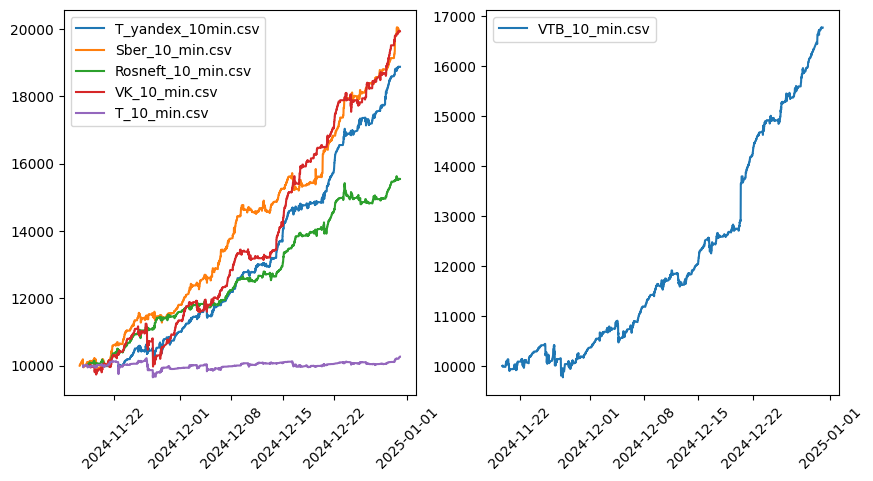

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

for i in range(6):
    stock = trading[i]
    history = dicts[i]
    history = history[history["datetime"] > "2024-07-01"]
    if stock[:3] == 'VTB':
        ax[1].plot(history['datetime'], history['budget'], label=stock)
        # ax[1].set_xtickslabels(rotation = 45)
        # ax[1].xticks
    else:
        ax[0].plot(history['datetime'], history['budget'], label=stock)
        # ax[0].set_xtickslabels(rotation = 45)
# ax[0].set_xticks(history['datetime'][::100], rotation=45)
# ax[0].set_xticks(history[::100])
ax[0].set_xticklabels(ax[0].get_xticklabels(),  rotation=45)
ax[1].set_xticklabels(ax[1].get_xticklabels(),  rotation=45)
ax[0].legend()
ax[1].legend()
plt.show()

In [5]:
accuracy_list = []
datasets = ['Yandex_10_min.csv', 'VTB_10_min.csv', 'Sber_10_min.csv', 'Rosneft_10_min.csv', 'VK_10_min.csv', 'T_10_min.csv']

for stock in datasets:
    data = FinData("../../datasets/" + stock)
    data.insert_shifts_norms([3, 6, 18])
    data.insert_rolling_means()
    data.insert_exp_rolling_means()
    data.insert_stochastic_oscillator()
    data.insert_high_low_diff()
    # data.insert_butter_filter()
    print(stock)

    args = {"iterations" : 10000, 
                "depth" : 5, 
                "learning_rate" : 0.01,
                "use_best_model" : True, 
                "l2_leaf_reg" : 200,
                "verbose" : False, 
                "loss_function" : 'Logloss', 
                "eval_metric" : 'Logloss', 
                "cat_features" : data.cat_features, 
                "random_state" : 42,
                "early_stopping_rounds" : 2000}
    model = CatboostFinModel(args)

    st_dt = dt.datetime(2024, 7, 1)
    end_dt = dt.datetime(2024, 12, 31)

    accuracy_list.append(model.test_weekly(data.df, start_dt=st_dt, end_dt=end_dt, cat=data.cat_features, num = data.numeric_features))

Yandex_10_min.csv


c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\examples\my_bottle_2\../..\model\model.py:424: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df[df['utc'] >= start_dt][df['utc'] <= end_dt].copy()


1.5619394553191444 low_normed_ma_6
1.5712674224159218 close_normed_stochastic_oscillator_ma_6
1.5953801776100978 close_high_norms_3
1.6087267711899191 high_norms_3
1.8236600394000617 close_normed_stochastic_oscillator_ma_18
1.9165727406269768 high_normed_ma_18
1.9550260570747955 low_normed_ma_3
1.9566845553680705 low_normed_ma_18
2.2252136621296605 close_high_norms_6
2.2274011738031674 close_normed_ema_18
2.4778996087558416 close_norms_3
2.700251261920835 low_norms_6
2.949736117592517 high_normed_ma_3
3.733740824787396 high_normed_ma_6
4.130929835025289 close_normed_ma_18
6.2089704558558925 close_normed_ma_6
7.902553027828262 close_normed_ma_3
8.649646280440383 close_normed_ema_3
9.796373794775423 close_normed_ema_6
17.29308265408471 volume
VTB_10_min.csv


c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\examples\my_bottle_2\../..\model\model.py:424: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df[df['utc'] >= start_dt][df['utc'] <= end_dt].copy()


1.9694045645639955 high_norms_3
2.03643287992976 close_normed_stochastic_oscillator_ma_6
2.040085065541891 close_normed_hl_diff_18
2.0639444120819515 close_normed_hl_diff_6
2.110949498070202 low_norms_6
2.159144465756667 high_norms_18
2.2853869918712295 close_normed_stochastic_oscillator_ma_18
2.458133673228876 close_high_norms_6
2.500420726326727 low_norms_3
2.5275056015135853 close_normed_stochastic_oscillator
2.531106114763933 high_normed_ma_6
2.5507303761427442 close_normed_stochastic_oscillator_ma_3
2.836368740660081 close_normed_ma_6
3.2473028442161262 close_high_norms_3
3.2831746382108338 low_normed_ma_3
4.710794642561408 close_normed_ema_6
5.092785155512778 close_normed_ma_3
5.221491072500954 high_normed_ma_3
9.473920713432705 close_normed_ema_3
16.02781235988822 volume
Sber_10_min.csv


c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\examples\my_bottle_2\../..\model\model.py:424: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df[df['utc'] >= start_dt][df['utc'] <= end_dt].copy()


1.7996954820607294 close_normed_hl_diff_6
2.0989713291768846 low_norms_6
2.191259783813962 close_normed_stochastic_oscillator_ma_6
2.2173802409876107 close_normed_hl_diff_3
2.221932861635364 low_norms_3
2.2560299465594706 close_normed_stochastic_oscillator_ma_18
2.2976010482119857 high_norms_3
2.3432784801478226 close_normed_ma_18
2.349675447643617 low_normed_ma_6
2.4002946068815874 close_high_norms_3
2.6898268963798033 close_normed_ma_6
2.7978899908781285 close_normed_ema_18
2.866369188929213 close_norms_3
2.963364560691942 high_normed_ma_6
3.36337269766185 low_normed_ma_3
3.519009155903076 close_normed_ema_6
5.02312379659741 high_normed_ma_3
5.927769210000883 close_normed_ma_3
11.063356946449755 close_normed_ema_3
19.11655803799836 volume
Rosneft_10_min.csv


c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\examples\my_bottle_2\../..\model\model.py:424: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df[df['utc'] >= start_dt][df['utc'] <= end_dt].copy()


1.7793105221993186 close_high_norms_18
1.902441419019505 low_norms_3
2.0813911370791773 close_norms_6
2.216458077074449 close_norms_3
2.2425381081463347 close_normed_ma_18
2.267814751939842 close_normed_stochastic_oscillator_ma_18
2.285343935736135 close_normed_stochastic_oscillator_ma_6
2.4250970368796754 high_normed_ma_18
2.5363004501271416 high_norms_6
2.8882547351757837 close_normed_ma_6
3.3903813125120803 close_normed_ema_18
3.445212007290794 low_normed_ma_6
3.5237065792051894 close_normed_ema_6
3.585775987795322 high_norms_3
3.925510807006234 close_high_norms_3
4.389523052070686 high_normed_ma_6
5.052179219172644 high_normed_ma_3
6.008670205399107 close_normed_ma_3
9.186606566598336 close_normed_ema_3
15.880341380525762 volume
VK_10_min.csv


c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\examples\my_bottle_2\../..\model\model.py:424: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df[df['utc'] >= start_dt][df['utc'] <= end_dt].copy()


1.7158115676674106 low_norms_6
1.7363599049082334 close_normed_hl_diff_6
1.7809092417627534 close_high_norms_6
2.076384341252588 high_norms_3
2.093679083972377 close_normed_ema_18
2.105920705385804 low_normed_ma_18
2.1986387673573113 close_normed_hl_diff_18
2.5327207910208025 close_normed_stochastic_oscillator
2.623325008400076 low_normed_ma_6
2.6912895960613277 close_norms_6
3.4022607305447594 high_normed_ma_6
3.787438510525536 low_normed_ma_3
3.9127937879884715 close_normed_ma_18
4.27624404342236 close_normed_ma_6
4.299050736435647 close_high_norms_3
5.064694027218472 close_normed_ma_3
5.4321759282223265 close_normed_ema_6
5.826071640519778 high_normed_ma_3
10.351600542836547 close_normed_ema_3
13.540367044373927 volume
T_10_min.csv


c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\examples\my_bottle_2\../..\model\model.py:424: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df[df['utc'] >= start_dt][df['utc'] <= end_dt].copy()


1.4896016360752788 close_normed_stochastic_oscillator_ma_3
1.5021934549090734 close_normed_ma_18
1.6529503979811988 close_norms_18
1.7018767726352004 close_norms_3
1.8187440697873887 close_normed_hl_diff_3
1.8200416099928187 close_normed_hl_diff_18
2.208325931375913 close_normed_hl_diff_6
2.2767695532020777 high_normed_ma_18
2.4854550768269417 high_norms_18
2.532447332946643 close_high_norms_3
2.7053396732621495 high_norms_3
3.4293762786610174 low_normed_ma_3
3.5872588196766726 low_normed_ma_6
3.7248707768939053 close_normed_ema_6
4.749684775459571 close_normed_ma_6
5.779939109559342 close_normed_ma_3
6.00730226897252 volume
6.300344699598326 high_normed_ma_6
6.467488930666664 high_normed_ma_3
20.13811993697268 close_normed_ema_3


C:\Users\burko\AppData\Local\Temp\ipykernel_22064\706602808.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = [e[:-11] for e in datasets], y = accuracy_list, palette='Set2')


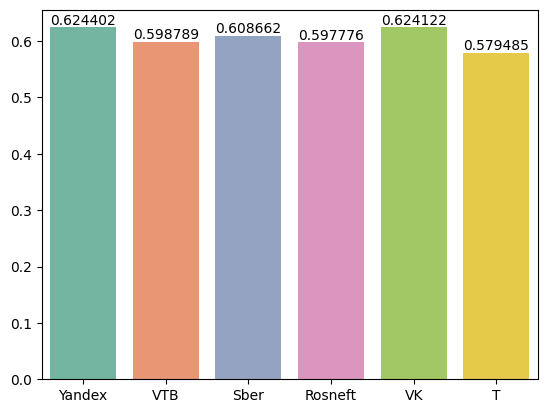

In [18]:
ax = sns.barplot(x = [e[:-11] for e in datasets], y = accuracy_list, palette='Set2')
# plt.xticks(rotation=45)
for i in range(6):
    ax.bar_label(ax.containers[i])
# ax.set_xticks(rotattion=45)

c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\examples\my_bottle_2\../..\model\model.py:469: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df[df['utc'] >= start_dt][df['utc'] <= end_dt].copy()


0:	learn: 0.6022803	test: 0.5606061	best: 0.5606061 (0)	total: 4.61ms	remaining: 36.9s
200:	learn: 0.6317907	test: 0.5808081	best: 0.5959596 (4)	total: 591ms	remaining: 22.9s
400:	learn: 0.6619718	test: 0.5959596	best: 0.5959596 (4)	total: 1.15s	remaining: 21.8s
600:	learn: 0.6948357	test: 0.6010101	best: 0.6060606 (494)	total: 1.71s	remaining: 21.1s
800:	learn: 0.7203219	test: 0.6060606	best: 0.6161616 (675)	total: 2.29s	remaining: 20.6s
1000:	learn: 0.7417840	test: 0.6060606	best: 0.6161616 (675)	total: 2.88s	remaining: 20.1s
1200:	learn: 0.7598927	test: 0.6060606	best: 0.6161616 (675)	total: 3.6s	remaining: 20.4s
1400:	learn: 0.7739772	test: 0.6111111	best: 0.6212121 (1287)	total: 4.17s	remaining: 19.6s
1600:	learn: 0.7894031	test: 0.6111111	best: 0.6212121 (1287)	total: 4.82s	remaining: 19.3s
1800:	learn: 0.8014755	test: 0.6010101	best: 0.6212121 (1287)	total: 5.38s	remaining: 18.5s
2000:	learn: 0.8101945	test: 0.5959596	best: 0.6212121 (1287)	total: 5.94s	remaining: 17.8s
2200:	le

c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\examples\my_bottle_2\../..\model\model.py:469: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df[df['utc'] >= start_dt][df['utc'] <= end_dt].copy()


0:	learn: 0.6126005	test: 0.5202020	best: 0.5202020 (0)	total: 4.36ms	remaining: 34.9s
200:	learn: 0.6554960	test: 0.5303030	best: 0.5303030 (61)	total: 700ms	remaining: 27.2s
400:	learn: 0.6936997	test: 0.5303030	best: 0.5353535 (205)	total: 1.42s	remaining: 26.9s
600:	learn: 0.7158177	test: 0.5303030	best: 0.5454545 (466)	total: 2.13s	remaining: 26.2s
800:	learn: 0.7345845	test: 0.5353535	best: 0.5454545 (466)	total: 2.83s	remaining: 25.4s
1000:	learn: 0.7500000	test: 0.5353535	best: 0.5454545 (466)	total: 3.64s	remaining: 25.5s
1200:	learn: 0.7660858	test: 0.5252525	best: 0.5454545 (466)	total: 4.37s	remaining: 24.7s
1400:	learn: 0.7841823	test: 0.5303030	best: 0.5454545 (466)	total: 5.21s	remaining: 24.5s
1600:	learn: 0.7955764	test: 0.5303030	best: 0.5454545 (466)	total: 5.91s	remaining: 23.6s
1800:	learn: 0.8063003	test: 0.5303030	best: 0.5454545 (466)	total: 6.61s	remaining: 22.8s
2000:	learn: 0.8116622	test: 0.5202020	best: 0.5454545 (466)	total: 7.41s	remaining: 22.2s
2200:	le

c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\examples\my_bottle_2\../..\model\model.py:469: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df[df['utc'] >= start_dt][df['utc'] <= end_dt].copy()


0:	learn: 0.6172922	test: 0.5505051	best: 0.5505051 (0)	total: 10.9ms	remaining: 1m 27s
200:	learn: 0.6756032	test: 0.5606061	best: 0.5808081 (1)	total: 753ms	remaining: 29.2s
400:	learn: 0.7091153	test: 0.5252525	best: 0.5808081 (1)	total: 1.54s	remaining: 29.2s
600:	learn: 0.7211796	test: 0.5151515	best: 0.5808081 (1)	total: 2.39s	remaining: 29.5s
800:	learn: 0.7479893	test: 0.5303030	best: 0.5808081 (1)	total: 3.11s	remaining: 27.9s
1000:	learn: 0.7654155	test: 0.5202020	best: 0.5808081 (1)	total: 3.83s	remaining: 26.8s
1200:	learn: 0.7821716	test: 0.5151515	best: 0.5808081 (1)	total: 4.54s	remaining: 25.7s
1400:	learn: 0.8002681	test: 0.5252525	best: 0.5808081 (1)	total: 5.26s	remaining: 24.8s
1600:	learn: 0.8109920	test: 0.5303030	best: 0.5808081 (1)	total: 5.97s	remaining: 23.9s
1800:	learn: 0.8176944	test: 0.5252525	best: 0.5808081 (1)	total: 6.72s	remaining: 23.1s
2000:	learn: 0.8331099	test: 0.5252525	best: 0.5808081 (1)	total: 7.45s	remaining: 22.3s
Stopped by overfitting det

c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\examples\my_bottle_2\../..\model\model.py:469: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df[df['utc'] >= start_dt][df['utc'] <= end_dt].copy()


0:	learn: 0.6058981	test: 0.5656566	best: 0.5656566 (0)	total: 4.03ms	remaining: 32.3s
200:	learn: 0.6508043	test: 0.5656566	best: 0.6010101 (111)	total: 717ms	remaining: 27.8s
400:	learn: 0.6809651	test: 0.5555556	best: 0.6010101 (111)	total: 1.41s	remaining: 26.8s
600:	learn: 0.7077748	test: 0.5555556	best: 0.6010101 (111)	total: 2.14s	remaining: 26.3s
800:	learn: 0.7305630	test: 0.5555556	best: 0.6010101 (111)	total: 3.88s	remaining: 34.9s
1000:	learn: 0.7593834	test: 0.5505051	best: 0.6010101 (111)	total: 4.63s	remaining: 32.3s
1200:	learn: 0.7768097	test: 0.5555556	best: 0.6010101 (111)	total: 5.45s	remaining: 30.8s
1400:	learn: 0.7982574	test: 0.5505051	best: 0.6010101 (111)	total: 6.17s	remaining: 29.1s
1600:	learn: 0.8123324	test: 0.5353535	best: 0.6010101 (111)	total: 6.89s	remaining: 27.6s
1800:	learn: 0.8223861	test: 0.5202020	best: 0.6010101 (111)	total: 7.68s	remaining: 26.4s
2000:	learn: 0.8351206	test: 0.5202020	best: 0.6010101 (111)	total: 8.52s	remaining: 25.5s
Stopped

c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\examples\my_bottle_2\../..\model\model.py:469: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df[df['utc'] >= start_dt][df['utc'] <= end_dt].copy()


0:	learn: 0.6197183	test: 0.5757576	best: 0.5757576 (0)	total: 4.22ms	remaining: 33.7s
200:	learn: 0.6552649	test: 0.6111111	best: 0.6111111 (115)	total: 716ms	remaining: 27.8s
400:	learn: 0.6834339	test: 0.6060606	best: 0.6212121 (226)	total: 1.43s	remaining: 27.1s
600:	learn: 0.7008719	test: 0.5808081	best: 0.6212121 (226)	total: 2.25s	remaining: 27.6s
800:	learn: 0.7243461	test: 0.5757576	best: 0.6212121 (226)	total: 2.94s	remaining: 26.5s
1000:	learn: 0.7545272	test: 0.5808081	best: 0.6212121 (226)	total: 3.65s	remaining: 25.5s
1200:	learn: 0.7733065	test: 0.5808081	best: 0.6212121 (226)	total: 4.47s	remaining: 25.3s
1400:	learn: 0.7880617	test: 0.5909091	best: 0.6212121 (226)	total: 5.3s	remaining: 25s
1600:	learn: 0.7987928	test: 0.5858586	best: 0.6212121 (226)	total: 6.08s	remaining: 24.3s
1800:	learn: 0.8101945	test: 0.5757576	best: 0.6212121 (226)	total: 6.78s	remaining: 23.3s
2000:	learn: 0.8202549	test: 0.5555556	best: 0.6212121 (226)	total: 7.65s	remaining: 22.9s
2200:	lear

c:\Users\burko\OneDrive\Documents\GitHub\prices-predictions\examples\my_bottle_2\../..\model\model.py:469: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df[df['utc'] >= start_dt][df['utc'] <= end_dt].copy()


0:	learn: 0.5991957	test: 0.5101010	best: 0.5101010 (0)	total: 7.59ms	remaining: 1m
200:	learn: 0.6306971	test: 0.5606061	best: 0.5707071 (3)	total: 1.07s	remaining: 41.4s
400:	learn: 0.6642091	test: 0.5757576	best: 0.5808081 (389)	total: 2.17s	remaining: 41.1s
600:	learn: 0.6963807	test: 0.5656566	best: 0.5858586 (412)	total: 3.01s	remaining: 37.1s
800:	learn: 0.7225201	test: 0.5656566	best: 0.5858586 (412)	total: 3.77s	remaining: 33.9s
1000:	learn: 0.7466488	test: 0.5808081	best: 0.5858586 (412)	total: 4.81s	remaining: 33.6s
1200:	learn: 0.7694370	test: 0.5808081	best: 0.5909091 (1085)	total: 5.9s	remaining: 33.4s
1400:	learn: 0.7935657	test: 0.5757576	best: 0.5909091 (1085)	total: 6.63s	remaining: 31.2s
1600:	learn: 0.8116622	test: 0.5858586	best: 0.5909091 (1085)	total: 7.33s	remaining: 29.3s
1800:	learn: 0.8237265	test: 0.5757576	best: 0.5909091 (1085)	total: 8.06s	remaining: 27.7s
2000:	learn: 0.8364611	test: 0.5656566	best: 0.5909091 (1085)	total: 8.79s	remaining: 26.4s
2200:	le

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Yandex_10_min.csv'),
  Text(1, 0, 'VTB_10_min.csv'),
  Text(2, 0, 'Sber_10_min.csv'),
  Text(3, 0, 'Rosneft_10_min.csv'),
  Text(4, 0, 'VK_10_min.csv'),
  Text(5, 0, 'T_10_min.csv')])

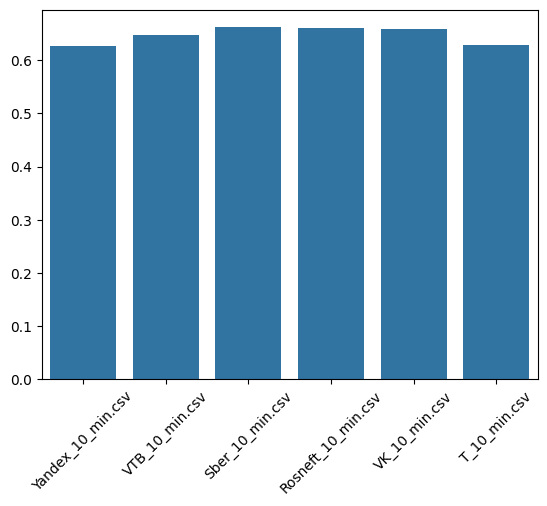

In [21]:
accuracy_list = []
datasets = ['Yandex_10_min.csv', 'VTB_10_min.csv', 'Sber_10_min.csv', 'Rosneft_10_min.csv', 'VK_10_min.csv', 'T_10_min.csv']

for stock in datasets:
    data = FinData("../../datasets/" + stock)
    data.insert_shifts_norms([3, 6, 18])
    data.insert_rolling_means()
    data.insert_exp_rolling_means()
    data.insert_stochastic_oscillator()
    data.insert_high_low_diff()
    # data.insert_butter_filter()

    args = {"iterations" : 8000, 
                "depth" : 5, 
                "learning_rate" : 0.01,
                "use_best_model" : True, 
                "l2_leaf_reg" : 200,
                "verbose" : 200, 
                "loss_function" : 'CrossEntropy', 
                "eval_metric" : 'Accuracy', 
                "cat_features" : data.cat_features, 
                "random_state" : 42,
                "early_stopping_rounds" : 2000}
    model = CatboostFinModel(args)

    st_dt = dt.datetime(2024, 9, 1)
    end_dt = dt.datetime(2024, 9, 30)

    accuracy_list.append(model.test_intersect(data.df, start_dt=st_dt, end_dt=end_dt, cat=data.cat_features, num = data.numeric_features))

sns.barplot(x = datasets, y = accuracy_list)
plt.xticks(rotation=45)

C:\Users\burko\AppData\Local\Temp\ipykernel_22064\706602808.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = [e[:-11] for e in datasets], y = accuracy_list, palette='Set2')


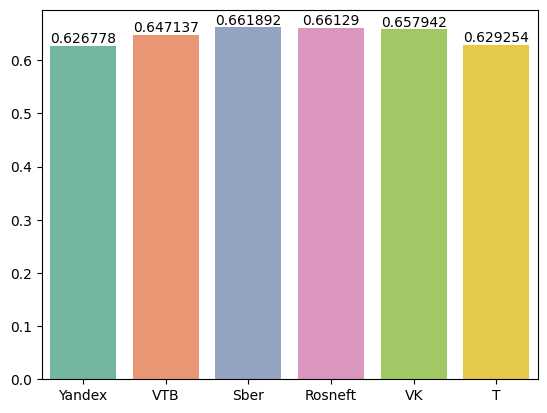

In [22]:
ax = sns.barplot(x = [e[:-11] for e in datasets], y = accuracy_list, palette='Set2')
# plt.xticks(rotation=45)
for i in range(6):
    ax.bar_label(ax.containers[i])
# ax.set_xticks(rotattion=45)